In [45]:
#import libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm





#read data
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [21]:
#What factors are most strongly correlated with GPA?

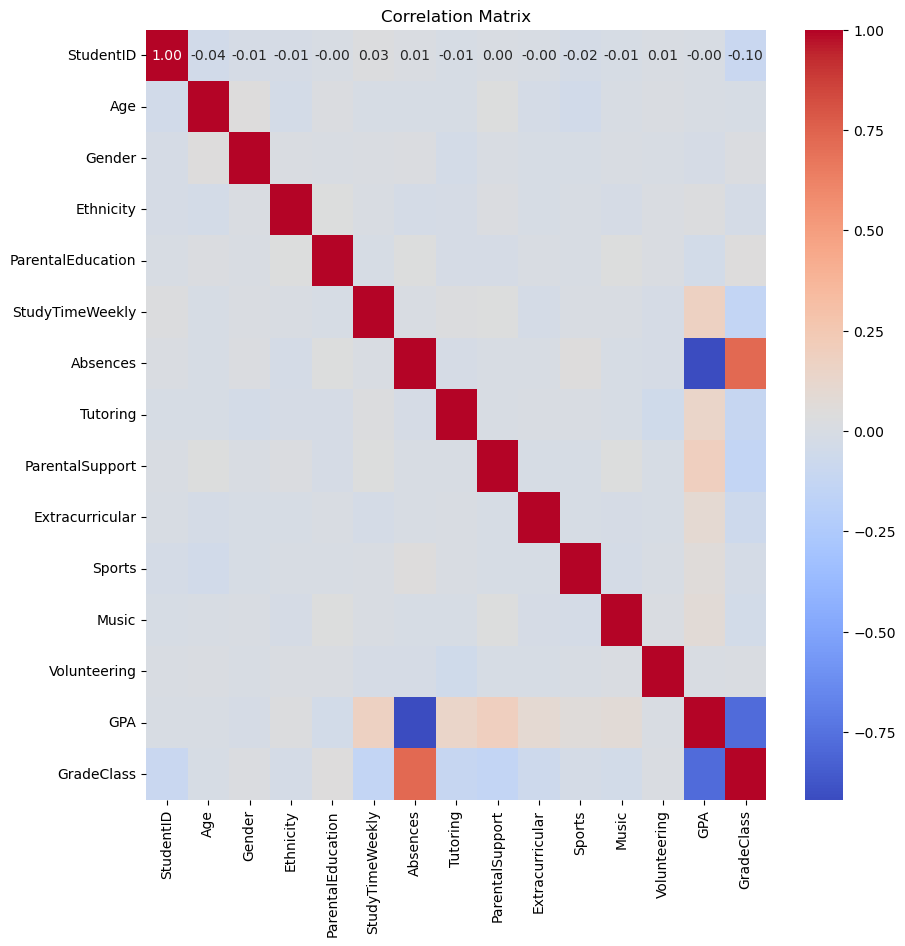

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
#How does study time weekly affect GPA?

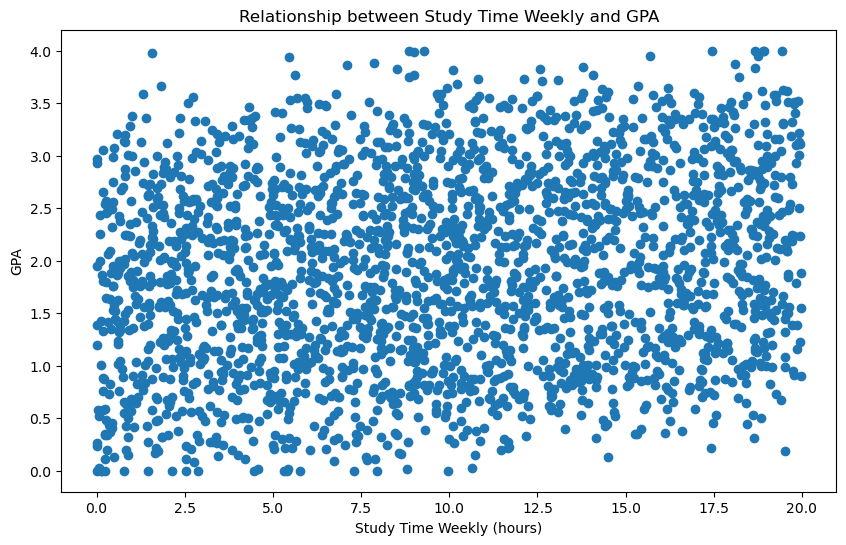

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data['StudyTimeWeekly'], data['GPA'], 'o') 
plt.title('Relationship between Study Time Weekly and GPA')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.show()

In [25]:
#Is there a significant difference in GPA based on gender?

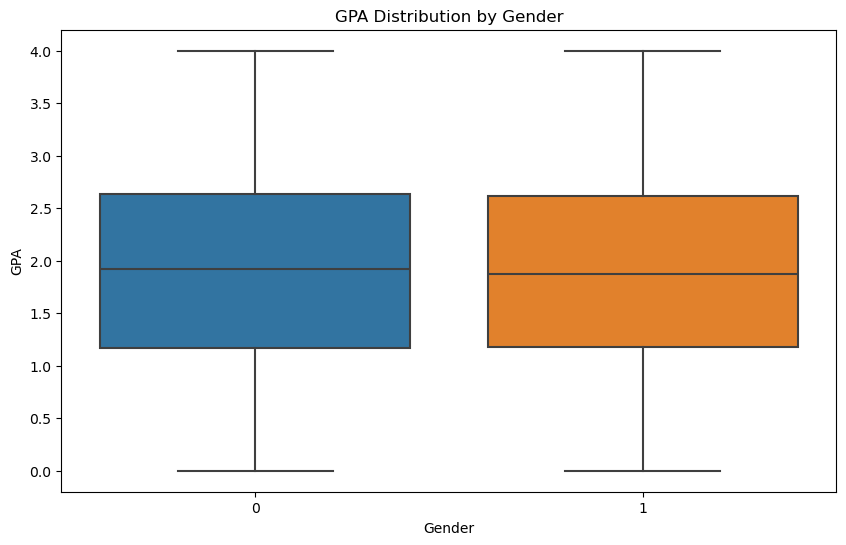

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='GPA', data=data)
plt.title('GPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.show()


In [27]:
#What is the impact of parental support on the number of absences?

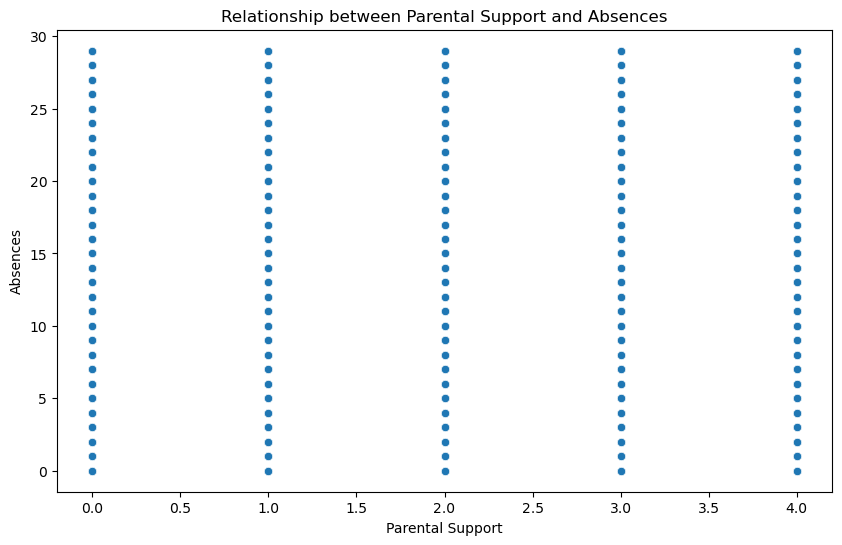

Correlation coefficient between Parental Support and Absences: 0.00


In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ParentalSupport', y='Absences', data=data)
plt.title('Relationship between Parental Support and Absences')
plt.xlabel('Parental Support')
plt.ylabel('Absences')
plt.show()
support_absences_corr = data['ParentalSupport'].corr(data['Absences'])
print(f'Correlation coefficient between Parental Support and Absences: {support_absences_corr:.2f}')

In [29]:
#How do extracurricular activities (sports, music, volunteering) impact GPA?

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Figure size 1000x600 with 0 Axes>

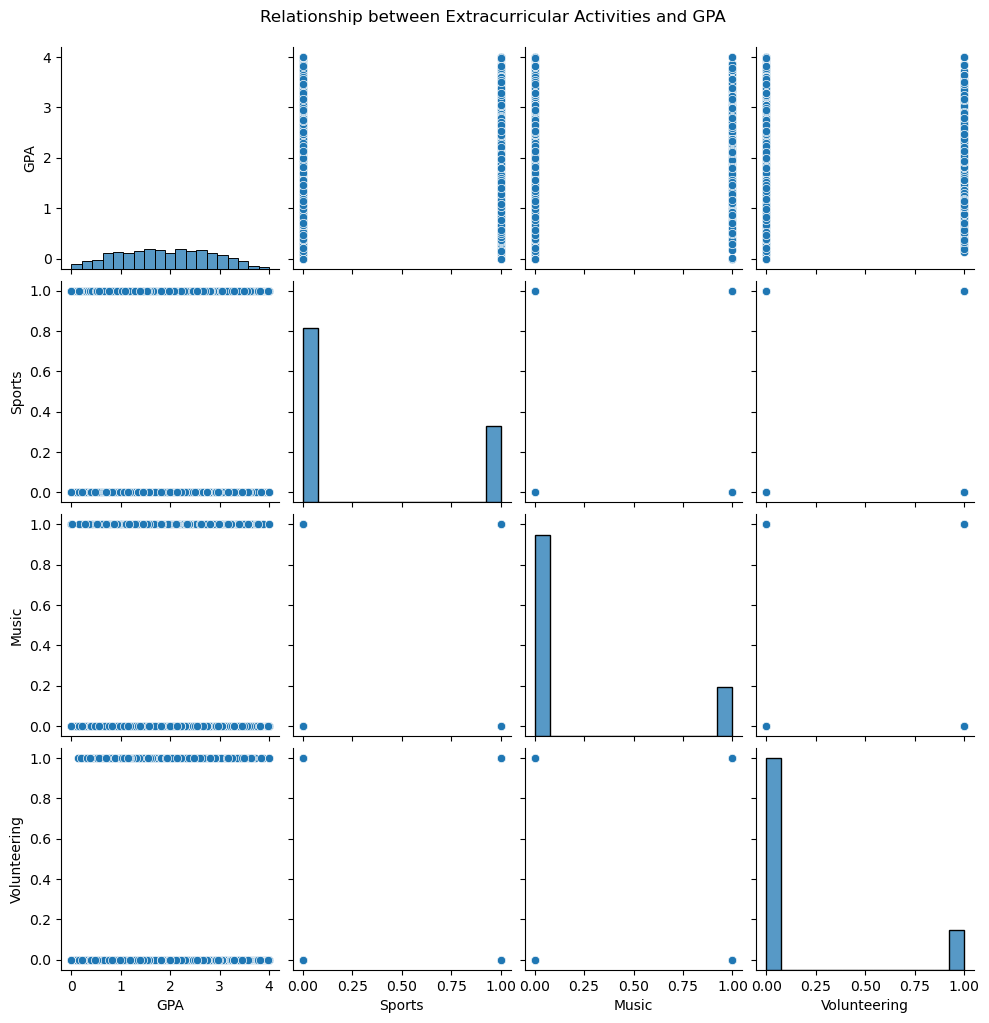

Sports-GPA correlation: 0.06
Music-GPA correlation: 0.07
Volunteering-GPA correlation: 0.00


In [30]:
plt.figure(figsize=(10, 6))
sns.pairplot(data, vars=['GPA', 'Sports', 'Music', 'Volunteering'])
plt.suptitle('Relationship between Extracurricular Activities and GPA', y=1.02)
plt.show()

sports_gpa_corr = data['Sports'].corr(data['GPA'])
music_gpa_corr = data['Music'].corr(data['GPA'])
volunteering_gpa_corr = data['Volunteering'].corr(data['GPA'])
print(f'Sports-GPA correlation: {sports_gpa_corr:.2f}')
print(f'Music-GPA correlation: {music_gpa_corr:.2f}')
print(f'Volunteering-GPA correlation: {volunteering_gpa_corr:.2f}')

In [31]:
#Is there a difference in the academic performance of students involved in sports versus those involved in music?

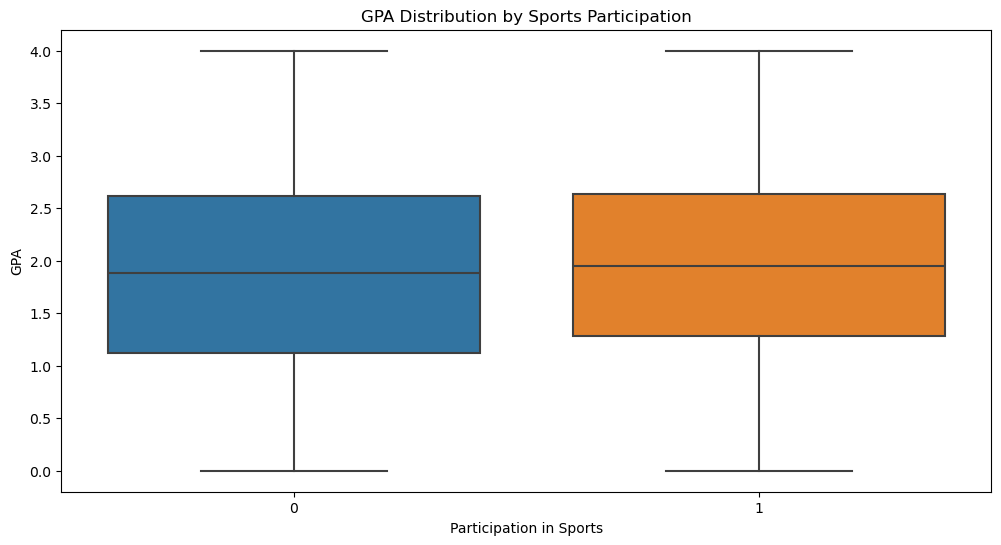

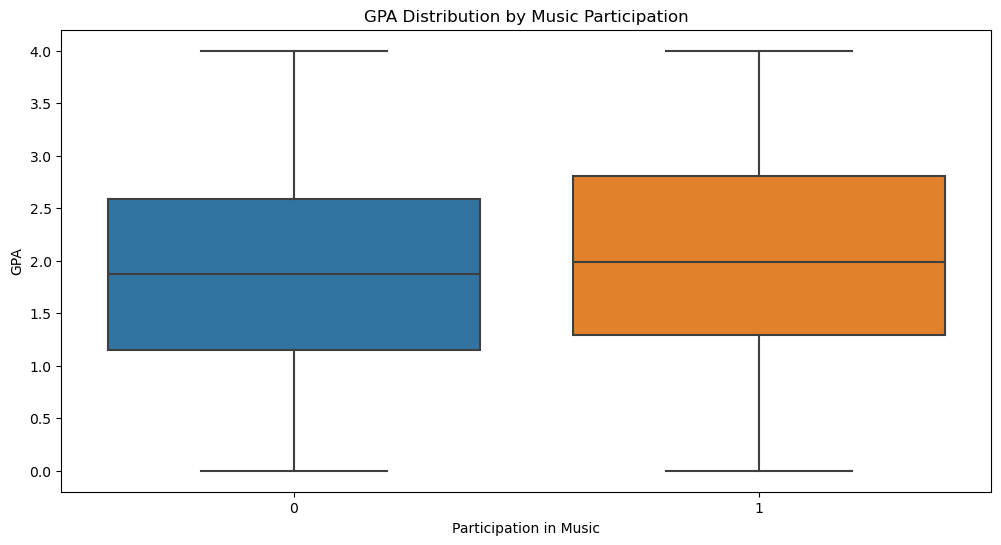

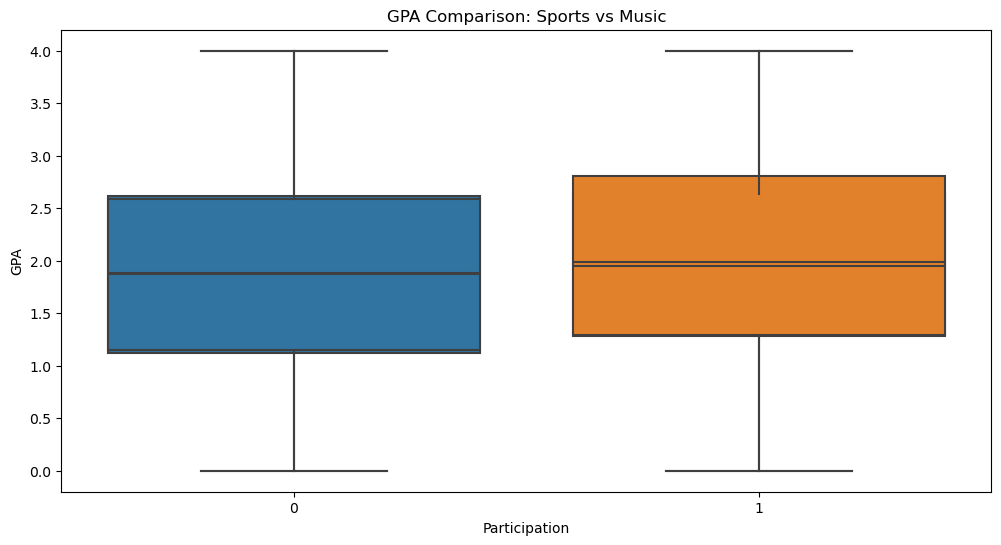

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sports', y='GPA', data=data)
plt.title('GPA Distribution by Sports Participation')
plt.xlabel('Participation in Sports')
plt.ylabel('GPA')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Music', y='GPA', data=data)
plt.title('GPA Distribution by Music Participation')
plt.xlabel('Participation in Music')
plt.ylabel('GPA')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sports', y='GPA', data=data)
sns.boxplot(x='Music', y='GPA', data=data)
plt.title('GPA Comparison: Sports vs Music')
plt.xlabel('Participation')
plt.ylabel('GPA')
plt.show()

In [33]:
#How does parental education level correlate with student GPA?

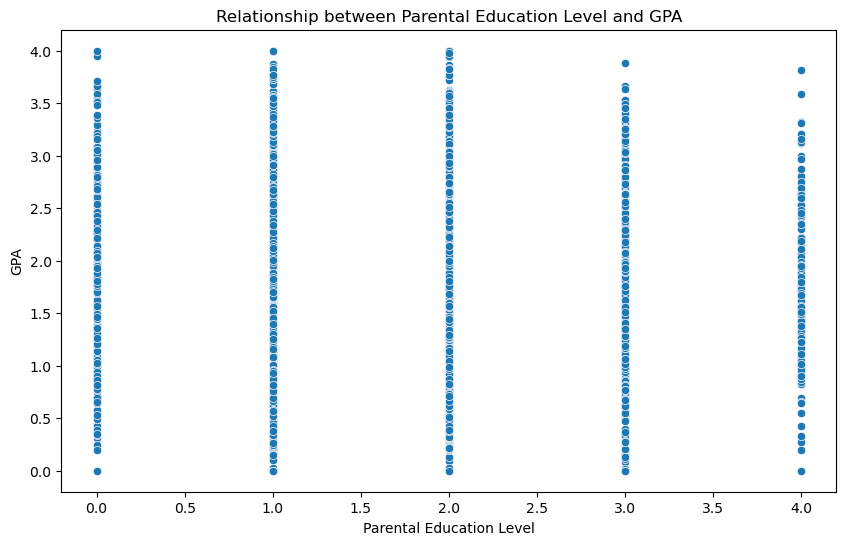

Correlation coefficient between Parental Education Level and GPA: -0.04


In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ParentalEducation', y='GPA', data=data)
plt.title('Relationship between Parental Education Level and GPA')
plt.xlabel('Parental Education Level')
plt.ylabel('GPA')
plt.show()

education_gpa_corr = data['ParentalEducation'].corr(data['GPA'])
print(f'Correlation coefficient between Parental Education Level and GPA: {education_gpa_corr:.2f}')

In [35]:
#What is the effect of parental support on student academic performance?

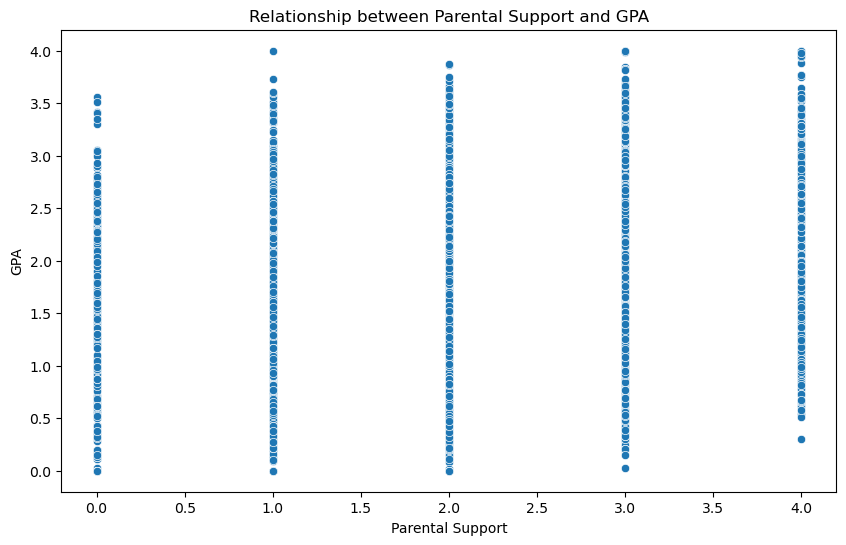

Correlation coefficient between Parental Support and GPA: 0.19


In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ParentalSupport', y='GPA', data=data)
plt.title('Relationship between Parental Support and GPA')
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.show()

support_gpa_corr = data['ParentalSupport'].corr(data['GPA'])
print(f'Correlation coefficient between Parental Support and GPA: {support_gpa_corr:.2f}')

In [37]:
#Does receiving tutoring correlate with higher GPAs?

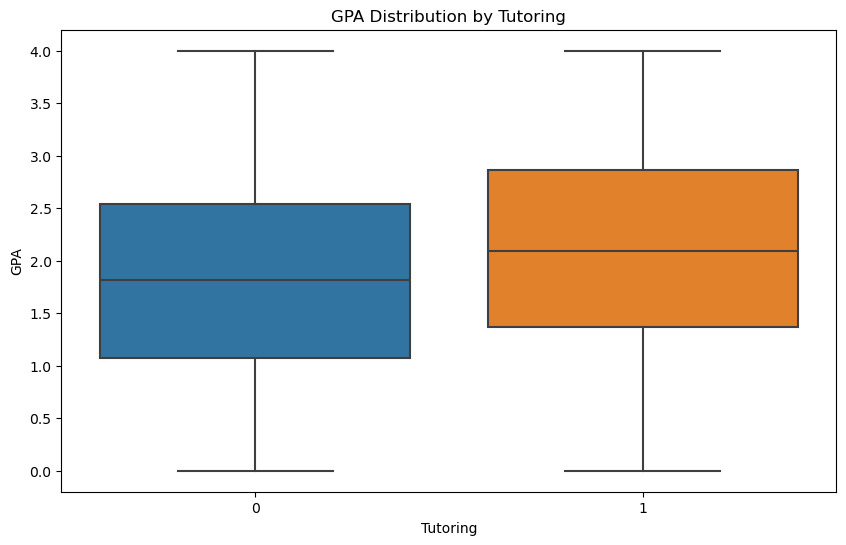

Correlation coefficient between Tutoring and GPA: 0.15


In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tutoring', y='GPA', data=data)
plt.title('GPA Distribution by Tutoring')
plt.xlabel('Tutoring')
plt.ylabel('GPA')
plt.show()

tutoring_gpa_corr = data['Tutoring'].corr(data['GPA'])
print(f'Correlation coefficient between Tutoring and GPA: {tutoring_gpa_corr:.2f}')

In [39]:
#What is the relationship between tutoring and absences?

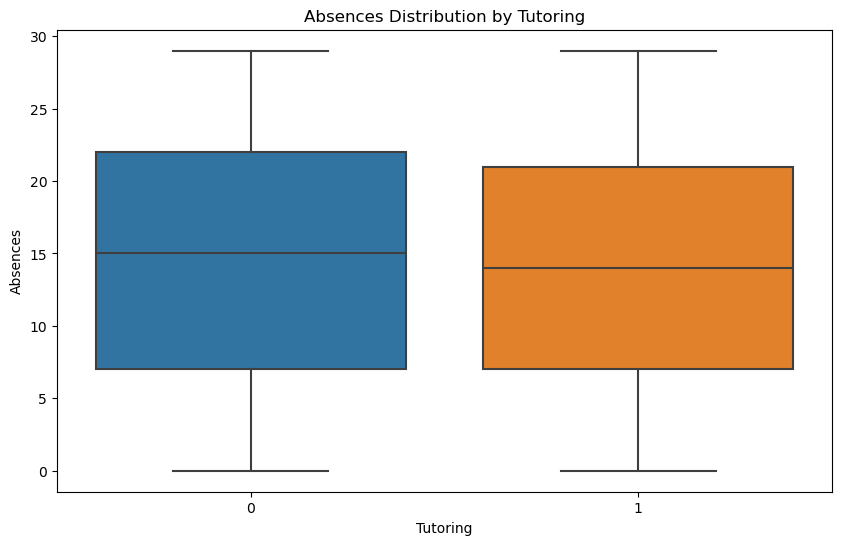

Correlation coefficient between Tutoring and Absences: -0.02


In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tutoring', y='Absences', data=data)
plt.title('Absences Distribution by Tutoring')
plt.xlabel('Tutoring')
plt.ylabel('Absences')
plt.show()

tutoring_absences_corr = data['Tutoring'].corr(data['Absences'])
print(f'Correlation coefficient between Tutoring and Absences: {tutoring_absences_corr:.2f}')

In [41]:
#How does GPA vary across different ethnic groups?

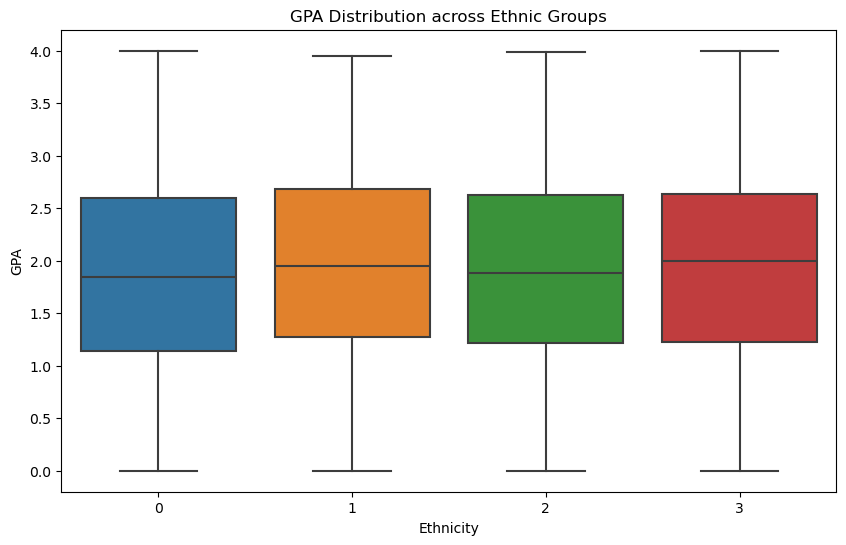

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ethnicity', y='GPA', data=data)
plt.title('GPA Distribution across Ethnic Groups')
plt.xlabel('Ethnicity')
plt.ylabel('GPA')
plt.show()

In [43]:
#What is the distribution of grades across different age groups?

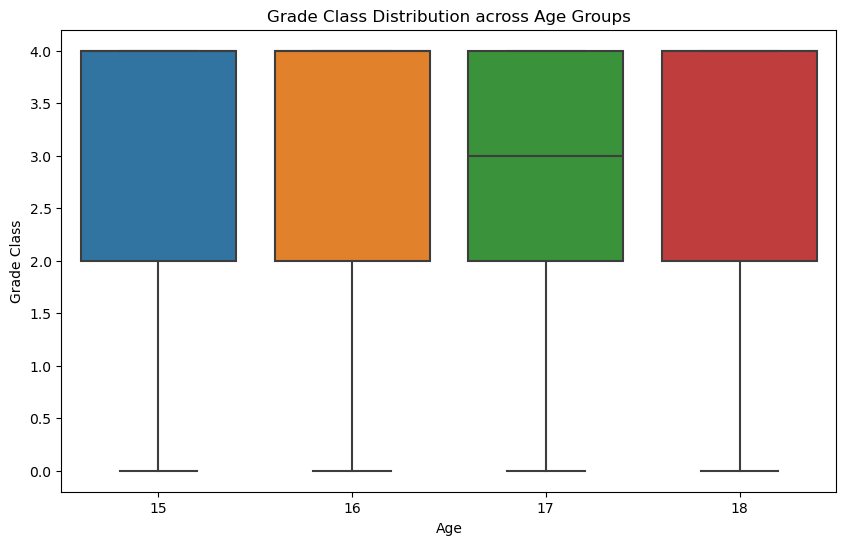

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='GradeClass', data=data)
plt.title('Grade Class Distribution across Age Groups')
plt.xlabel('Age')
plt.ylabel('Grade Class')
plt.show()

In [59]:
#Calculate the mutual information between GPA and GradeClass

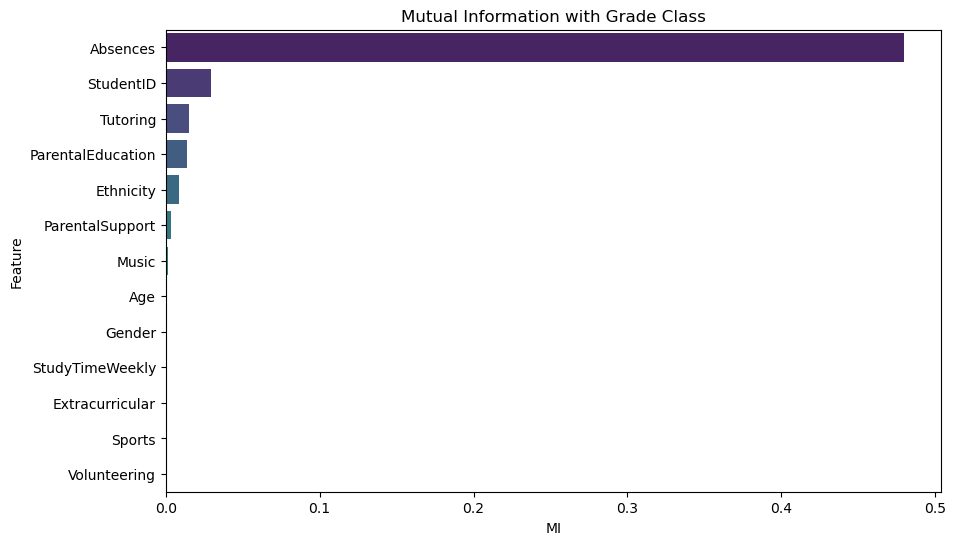

In [47]:
X = data.drop(columns=['GPA', 'GradeClass'])  # Features
y = data['GradeClass']  # Target (assuming classification)

# Calculate Mutual Information
mi = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi})
mi_df = mi_df.sort_values('MI', ascending=False)

# Plot MI
plt.figure(figsize=(10, 6))
sns.barplot(x='MI', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information with Grade Class')
plt.show()


In [60]:
#Principal Component Analysis

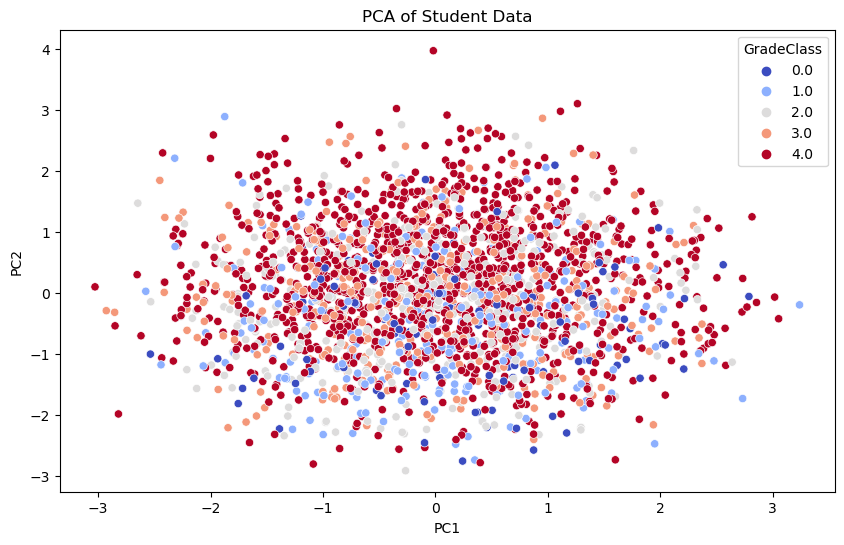

In [48]:
# Standardize the data
X_standardized = (X - X.mean()) / X.std()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['GradeClass'] = y

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='GradeClass', data=pca_df, palette='coolwarm')
plt.title('PCA of Student Data')
plt.show()


In [61]:
#t-test for comparing GPA across different groups

In [51]:
# T-test for GPA across Gender groups
gpa_male = data[data['Gender'] == 'Male']['GPA']
gpa_female = data[data['Gender'] == 'Female']['GPA']

t_stat, p_value = stats.ttest_ind(gpa_male, gpa_female)

print(f"T-test for GPA across Genders: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-test for GPA across Genders: t-statistic = nan, p-value = nan


In [ ]:
#Visualize the distribution of GPA by categories

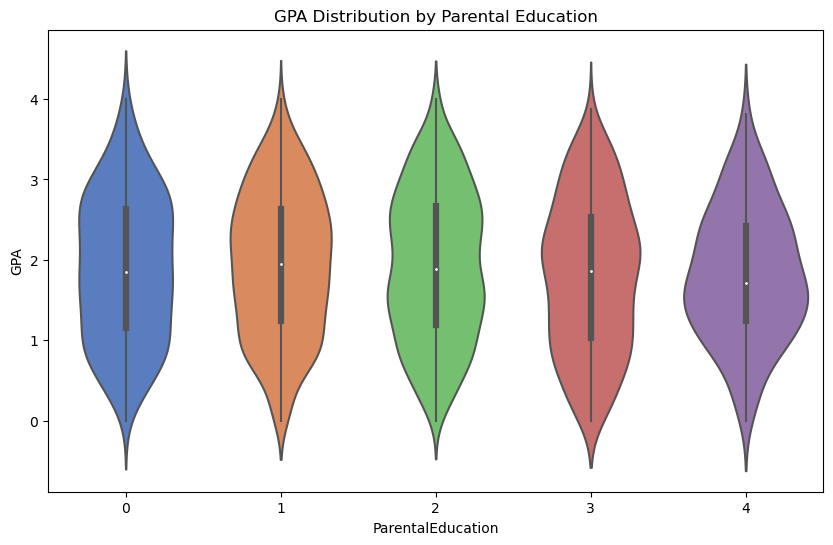

In [53]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ParentalEducation', y='GPA', data=data, palette='muted')
plt.title('GPA Distribution by Parental Education')
plt.show()


In [ ]:
#Check the normality of GPA distribution:

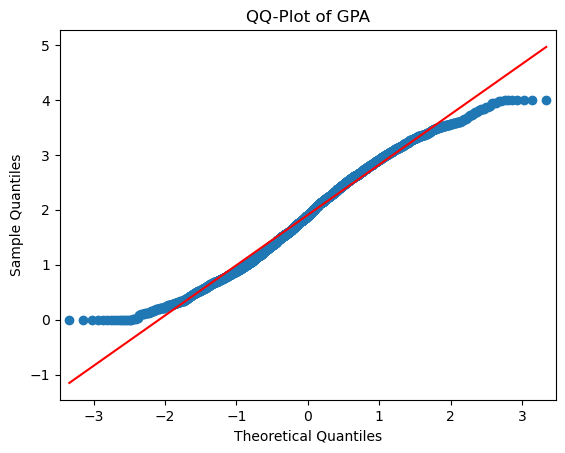

In [54]:
# QQ-Plot for GPA
sm.qqplot(data['GPA'], line='s')
plt.title('QQ-Plot of GPA')
plt.show()
